In [1]:
import pandas as pd


In [23]:
# Load the questionnaire data
questionnaire_df = pd.read_excel('data/questionnaire_data-561422-2025-11-11-1622.xlsx')

# Display column names
print("Column names:")
print(list(questionnaire_df.columns))
print(questionnaire_df.columns)

Column names:
['$submission_id', '$created', 'Participant number', 'What is your gender', 'How old are you?', 'What is your dominant hand?', 'How experienced are you with robotic systems?', 'Did you experience delays between your actions and the robot&#39;s movements?', 'How difficult was it to perform the task?', 'I felt like I was controlling the movement of the robot', 'It felt like the robot was part of my body', 'Did you experience delays between your actions and the robot&#39;s movements?.1', 'How difficult was it to perform the task?.1', 'I felt like I was controlling the movement of the robot.1', 'It felt like the robot was part of my body.1', 'Did you experience delays between your actions and the robot&#39;s movements?.2', 'How difficult was it to perform the task?.2', 'I felt like I was controlling the movement of the robot.2', 'It felt like the robot was part of my body.2', 'Did you experience delays between your actions and the robot&#39;s movements?.3', 'How difficult was

/home/michaelt/.cache/pypoetry/virtualenvs/in9060-as2-Pf7P2CoS-py3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# Filter out columns containing "$"
filtered_columns = [col for col in questionnaire_df.columns if '$' not in col and col != 'Participant number']

# Calculate mean and variance for the filtered columns
stats_df = pd.DataFrame({
    'Mean': questionnaire_df[filtered_columns].mean(numeric_only=True),
    'Variance': questionnaire_df[filtered_columns].var(numeric_only=True)
})

print(stats_df)

                                                         Mean  Variance
How old are you?                                    24.633333  5.412644
How experienced are you with robotic systems?        1.100000  0.093103
Did you experience delays between your actions ...   2.433333  1.357471
How difficult was it to perform the task?            2.933333  0.547126
I felt like I was controlling the movement of t...   4.233333  0.598851
It felt like the robot was part of my body           2.433333  1.150575
Did you experience delays between your actions ...   2.300000  1.044828
How difficult was it to perform the task?.1          2.300000  0.906897
I felt like I was controlling the movement of t...   4.166667  0.626437
It felt like the robot was part of my body.1         2.800000  1.062069
Did you experience delays between your actions ...   2.500000  1.155172
How difficult was it to perform the task?.2          2.400000  0.731034
I felt like I was controlling the movement of t...   4.100000  0

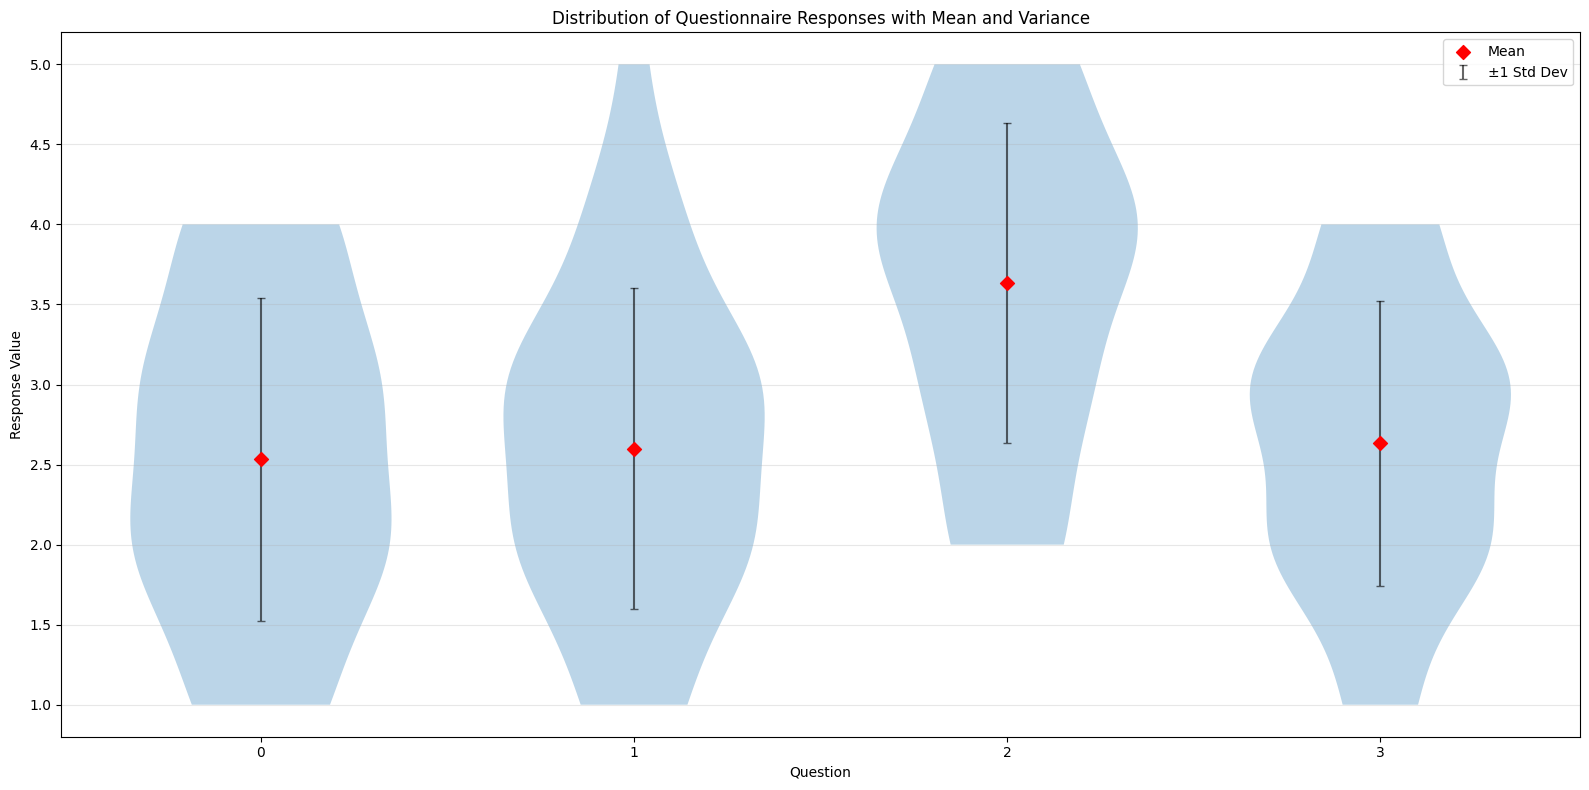

['Did you experience delays between your actions and the robot&#39;s movements?.8', 'How difficult was it to perform the task?.8', 'I felt like I was controlling the movement of the robot.8', 'It felt like the robot was part of my body.8']


In [21]:
import matplotlib.pyplot as plt

# Additional filtering: remove first three columns and columns with ".9" or ".8"
# filtered_columns = [col for col in filtered_columns 
#                    if col not in list(questionnaire_df.columns[:4]) 
#                    and '.9' not in col 
#                    and '.8' not in col]
filtered_columns = [col for col in questionnaire_df.columns 
                   if '$' not in col 
                   and col != 'Participant number' 
                   and '.8' in col]
                # Apply the same filter to stats_df
stats_df = pd.DataFrame({
    'Mean': questionnaire_df[filtered_columns].mean(numeric_only=True),
    'Variance': questionnaire_df[filtered_columns].var(numeric_only=True)
})

# Create a figure with appropriate size
fig, ax = plt.subplots(figsize=(16, 8))

# Prepare data for violin plot
positions = range(len(stats_df))
data_to_plot = [questionnaire_df[col].dropna() for col in filtered_columns if col in questionnaire_df.select_dtypes(include='number').columns]
labels = [col for col in filtered_columns if col in questionnaire_df.select_dtypes(include='number').columns]

# Create violin plot
parts = ax.violinplot(data_to_plot, positions=positions, widths=0.7, showmeans=False, showextrema=False)

# Add mean markers
means = stats_df['Mean'].values
ax.scatter(positions, means, color='red', s=50, zorder=3, label='Mean', marker='D')

# Add variance bars (showing ±sqrt(variance) = standard deviation)
variances = stats_df['Variance'].values
std_devs = variances ** 0.5
ax.errorbar(positions, means, yerr=std_devs, fmt='none', ecolor='black', capsize=3, alpha=0.6, label='±1 Std Dev')

# Customize plot
ax.set_xticks(positions)
# ax.set_xticklabels(labels, rotation=90, ha='right')
ax.set_ylabel('Response Value')
ax.set_xlabel('Question')
ax.set_title('Distribution of Questionnaire Responses with Mean and Variance')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(labels)

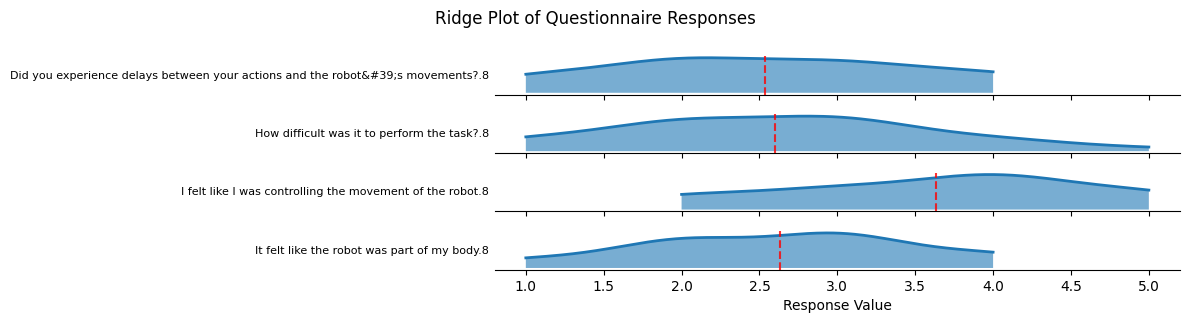

In [24]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Create ridge plot
fig, axes = plt.subplots(len(filtered_columns), 1, figsize=(12, len(filtered_columns) * 0.8), sharex=True)

# If only one column, make axes a list
if len(filtered_columns) == 1:
    axes = [axes]

for idx, col in enumerate(filtered_columns):
    if col in questionnaire_df.select_dtypes(include='number').columns:
        data = questionnaire_df[col].dropna()
        
        # Create KDE
        density = stats.gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 200)
        y = density(x_range)
        
        # Plot the distribution
        axes[idx].fill_between(x_range, y, alpha=0.6)
        axes[idx].plot(x_range, y, linewidth=2)
        
        # Add mean line
        mean_val = data.mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
        
        # Customize
        axes[idx].set_ylabel(col, fontsize=8, rotation=0, ha='right', va='center')
        axes[idx].set_yticks([])
        axes[idx].spines['left'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)

plt.xlabel('Response Value')
plt.suptitle('Ridge Plot of Questionnaire Responses', y=0.995)
plt.tight_layout()
plt.show()